<a href="https://colab.research.google.com/github/vasan145/Vehicle-Routoing-Problem/blob/main/VRP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
aaaazzad

In [ ]:
#TASK 1 - Install matplotlib and deap
#       - Import all necessary libraries



In [ ]:
#SOLUTION
!pip install matplotlib deap

# Required Libraries
import random
import numpy as np
import matplotlib.pyplot as pltaxrf
from deap import base, creator, tools, algorithms

In [ ]:
# TODO: Task 2 - Define the number of locations and vehicles

num_locations = # Define the number of locations (eg 10)

locations = # Create a list of tuples representing location coordinates -
            # try to use a random number generator
            # (x, y) could be between 0 and 100

depot = # Define the coordinates for the depot

num_vehicles = # Define the number of vehicles - (eg 3)

SyntaxError: invalid syntax (<ipython-input-5-aba1bff84959>, line 3)

In [ ]:
#SOLUTION

num_locations = 20  # Define how many locations (excluding the depot) the vehicles need to visit
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]  # Generate random (x, y) coordinates for each location
depot = (50, 50)  # Define the central depot location as a fixed point
num_vehicles = 3  # Define how many vehicles are available to visit the locations

In [ ]:
# TASK 3 - Genetic Algorithm Setup
       # - Figure out how to represent an individual OR encode an individual

creator.create("FitnessMin", )
creator.create("Individual", )

TypeError: create() missing 1 required positional argument: 'base'

In [ ]:
#TASK 4 - Starting with the toolbox and tools

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", #finish defining how to build an individual)
toolbox.register("population", #finish defining how to build an population)

SyntaxError: incomplete input (<ipython-input-8-74b7a34af842>, line 6)

In [ ]:
#SOLUTION - TASK 3 and 4

# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))  # Define fitness function to minimize. The two objectives are total distance and balance penalty.
creator.create("Individual", list, fitness=creator.FitnessMin)  # Define individual structure. Individuals are lists with a fitness attribute.

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)  # Function to generate a list of unique, randomly ordered location indices
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)  # Function to create an individual as a shuffled list of location indices
toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # Function to create a population of individuals


In [ ]:
# TASK 5 and 6

def evalVRP(individual):
    # TODO: Task 5 - Write the fitness evaluation function
    #              - Return (total distance, standard deviation)



#TASK 6 - Register the evaluate function in the toolbox

SyntaxError: incomplete input (<ipython-input-12-1dcc81bfa9a8>, line 9)

In [ ]:
# HINT CODE

def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):

        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]

        # Calculate total distance traveled by this vehicle


        total_distance += vehicle_distance
        distances.append(vehicle_distance)

    balance_penalty = np.std(#finish code)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

toolbox.register("evaluate", evalVRP)

SyntaxError: '(' was never closed (<ipython-input-10-7e680449e372>, line 17)

In [ ]:
#SOLUTION CODE


#Fitness Function
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):

        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]

        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))

        total_distance += vehicle_distance
        distances.append(vehicle_distance)

    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

toolbox.register("evaluate", evalVRP)

In [ ]:
# TODO: Task 7 - Configure the genetic operators

toolbox.register("mate", # Choose and configure a crossover method)
toolbox.register("mutate", # Choose and configure a mutation method)
toolbox.register("select", # Choose and configure a selection method)

In [ ]:
#HINTS

#Select is simpler, try tournament selection or roulette selection. Look up how to add that.

#FOR mutation - mutShuffleIndexes

#For mate - cxPartialyMatched, cxOrdered

In [ ]:
#SOLUTION

toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Register the selection function using tournament selection

In [ ]:
# SOLUTION - TASK 8
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-', 'rs')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

In [ ]:
#TASK 8 - Plotting Function
def plot_routes(individual, title="Routes"):
    #TODO: Write a function to visualize the routes - just plot the points and lines for each vehicle




SyntaxError: incomplete input (<ipython-input-15-36a7dba74c3e>, line 5)

gen	nevals	avg    	min    
0  	300   	601.766	2.02397
1  	213   	580.464	2.65303
2  	243   	571.848	2.65303
3  	232   	559.269	2.65303
4  	233   	553.282	2.49601
5  	218   	541.339	2.65303
6  	213   	537.096	2.65303
7  	233   	539.309	2.90638
8  	219   	530.756	4.03069
9  	209   	518.149	4.29235
10 	224   	515.831	1.99525
11 	230   	513.279	4.55096
12 	230   	506.059	1.00651
13 	217   	498.759	3.3221 
14 	231   	495.673	2.77921
15 	250   	494.812	3.07872
16 	238   	486.845	2.49974
17 	236   	471.891	5.26279
18 	225   	465.32 	2.91227
19 	225   	453.053	0.0590649
20 	209   	437.057	0.0590649
21 	232   	437.555	0.0590649
22 	237   	428.457	0.0590649
23 	217   	422.421	0.722058 
24 	227   	413.317	1.38058  
25 	246   	404.123	1.38058  
26 	233   	397.596	1.38058  
27 	219   	390.685	0.882901 
28 	229   	384.03 	0.663909 
29 	223   	383.238	1.83581  
30 	238   	375.799	1.67523  
31 	225   	375.065	1.67523  
32 	221   	371.124	1.67523  
33 	243   	369.494	1.52684  
34 	232   	362.921	1.5268

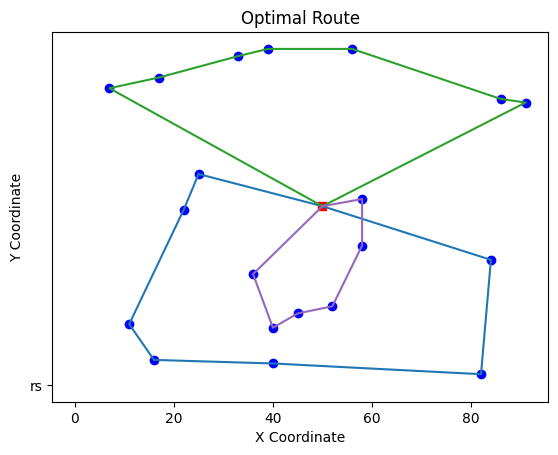

In [ ]:
# Running the Genetic Algorithm
# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()